In [1]:
import sys
import time
import os.path
from glob import glob
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/utils/')

import data_utils as du
import graph_utils as gu

from namelist import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [4]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

In [5]:
# def bs_3c(pred, frac, o, hist):
#     '''
#     bs three components decompose
#     '''
#     L = len(pred)
#     f = np.empty((L,))
#     r = np.empty((L,))
#     for i in range(L):
#         f[i] = np.nansum(((pred[i, :] - frac[i, :])**2)*hist[i, :])/np.sum(hist[i, :])
#         r[i] = np.nansum(((frac[i, :] - o[i])**2)*hist[i, :])/np.sum(hist[i, :])
#     return f, r

# with h5py.File(save_dir+'D_SCNN_Calib_loc0.hdf', 'r') as h5io:
#     SCNN_frac_loc0 = h5io['pos_frac'][...]
#     SCNN_pred_loc0 = h5io['pred_value'][...]
#     SCNN_use_loc0 = h5io['use'][...]
#     o_bar_loc0 = h5io['o_bar'][...]

# with h5py.File(save_dir+'BCSD_SCNN_Calib_loc0.hdf', 'r') as h5io:
#     BCSD_SCNN_frac_loc0 = h5io['pos_frac'][...]
#     BCSD_SCNN_pred_loc0 = h5io['pred_value'][...]
#     BCSD_SCNN_use_loc0 = h5io['use'][...]
    
# with h5py.File(save_dir+'DCNN_SCNN_Calib_loc0.hdf', 'r') as h5io:
#     DCNN_SCNN_frac_loc0 = h5io['pos_frac'][...]
#     DCNN_SCNN_pred_loc0 = h5io['pred_value'][...]
#     DCNN_SCNN_use_loc0 = h5io['use'][...]
    
# with h5py.File(save_dir+'D_SCNN_Calib_loc1.hdf', 'r') as h5io:
#     SCNN_frac_loc1 = h5io['pos_frac'][...]
#     SCNN_pred_loc1 = h5io['pred_value'][...]
#     SCNN_use_loc1 = h5io['use'][...]
#     o_bar_loc1 = h5io['o_bar'][...]
    
# with h5py.File(save_dir+'BCSD_SCNN_Calib_loc1.hdf', 'r') as h5io:
#     BCSD_SCNN_frac_loc1 = h5io['pos_frac'][...]
#     BCSD_SCNN_pred_loc1 = h5io['pred_value'][...]
#     BCSD_SCNN_use_loc1 = h5io['use'][...]
    
# with h5py.File(save_dir+'DCNN_SCNN_Calib_loc1.hdf', 'r') as h5io:
#     DCNN_SCNN_frac_loc1 = h5io['pos_frac'][...]
#     DCNN_SCNN_pred_loc1 = h5io['pred_value'][...]
#     DCNN_SCNN_use_loc1 = h5io['use'][...]
    
# with h5py.File(save_dir+'D_SCNN_Calib_loc2.hdf', 'r') as h5io:
#     SCNN_frac_loc2 = h5io['pos_frac'][...]
#     SCNN_pred_loc2 = h5io['pred_value'][...]
#     SCNN_use_loc2 = h5io['use'][...]
#     o_bar_loc2 = h5io['o_bar'][...]
    
# with h5py.File(save_dir+'BCSD_SCNN_Calib_loc2.hdf', 'r') as h5io:
#     BCSD_SCNN_frac_loc2 = h5io['pos_frac'][...]
#     BCSD_SCNN_pred_loc2 = h5io['pred_value'][...]
#     BCSD_SCNN_use_loc2 = h5io['use'][...]
    
# with h5py.File(save_dir+'DCNN_SCNN_Calib_loc2.hdf', 'r') as h5io:
#     DCNN_SCNN_frac_loc2 = h5io['pos_frac'][...]
#     DCNN_SCNN_pred_loc2 = h5io['pred_value'][...]
#     DCNN_SCNN_use_loc2 = h5io['use'][...]

In [6]:
# PLOT_loc0 = {}
# PLOT_loc0['scnn_fm'] = np.mean(SCNN_frac_loc0, axis=2)
# PLOT_loc0['scnn_pm'] = np.mean(SCNN_pred_loc0, axis=2)
# # 95 CI
# PLOT_loc0['scnn_fs'] = np.quantile(np.abs(SCNN_frac_loc0-PLOT_loc0['scnn_fm'][..., None]), 0.95, axis=2)

# PLOT_loc0['bcsd_fm'] = np.mean(BCSD_SCNN_frac_loc0, axis=2)
# PLOT_loc0['bcsd_pm'] = np.mean(BCSD_SCNN_pred_loc0, axis=2)
# PLOT_loc0['bcsd_fs'] = np.quantile(np.abs(BCSD_SCNN_frac_loc0-PLOT_loc0['bcsd_fm'][..., None]), 0.95, axis=2)

# PLOT_loc0['dcnn_fm'] = np.mean(DCNN_SCNN_frac_loc0, axis=2)
# PLOT_loc0['dcnn_pm'] = np.mean(DCNN_SCNN_pred_loc0, axis=2)
# PLOT_loc0['dcnn_fs'] = np.quantile(np.abs(DCNN_SCNN_frac_loc0-PLOT_loc0['dcnn_fm'][..., None]), 0.95, axis=2)

# PLOT_loc1 = {}
# PLOT_loc1['scnn_fm'] = np.mean(SCNN_frac_loc1, axis=2)
# PLOT_loc1['scnn_pm'] = np.mean(SCNN_pred_loc1, axis=2)
# PLOT_loc1['scnn_fs'] = np.quantile(np.abs(SCNN_frac_loc1-PLOT_loc1['scnn_fm'][..., None]), 0.95, axis=2)

# PLOT_loc1['bcsd_fm'] = np.mean(BCSD_SCNN_frac_loc1, axis=2)
# PLOT_loc1['bcsd_pm'] = np.mean(BCSD_SCNN_pred_loc1, axis=2)
# PLOT_loc1['bcsd_fs'] = np.quantile(np.abs(BCSD_SCNN_frac_loc1-PLOT_loc1['bcsd_fm'][..., None]), 0.95, axis=2)

# PLOT_loc1['dcnn_fm'] = np.mean(DCNN_SCNN_frac_loc1, axis=2)
# PLOT_loc1['dcnn_pm'] = np.mean(DCNN_SCNN_pred_loc1, axis=2)
# PLOT_loc1['dcnn_fs'] = np.quantile(np.abs(DCNN_SCNN_frac_loc1-PLOT_loc1['dcnn_fm'][..., None]), 0.95, axis=2)

# PLOT_loc2 = {}
# PLOT_loc2['scnn_fm'] = np.mean(SCNN_frac_loc2, axis=2)
# PLOT_loc2['scnn_pm'] = np.mean(SCNN_pred_loc2, axis=2)
# PLOT_loc2['scnn_fs'] = np.quantile(np.abs(SCNN_frac_loc2-PLOT_loc2['scnn_fm'][..., None]), 0.95, axis=2)

# PLOT_loc2['bcsd_fm'] = np.mean(BCSD_SCNN_frac_loc2, axis=2)
# PLOT_loc2['bcsd_pm'] = np.mean(BCSD_SCNN_pred_loc2, axis=2)
# PLOT_loc2['bcsd_fs'] = np.quantile(np.abs(BCSD_SCNN_frac_loc2-PLOT_loc2['bcsd_fm'][..., None]), 0.95, axis=2)

# PLOT_loc2['dcnn_fm'] = np.mean(DCNN_SCNN_frac_loc2, axis=2)
# PLOT_loc2['dcnn_pm'] = np.mean(DCNN_SCNN_pred_loc2, axis=2)
# PLOT_loc2['dcnn_fs'] = np.quantile(np.abs(DCNN_SCNN_frac_loc2-PLOT_loc2['dcnn_fm'][..., None]), 0.95, axis=2)

In [7]:
# USE_loc0 = {}
# USE_loc0['scnn'] = SCNN_use_loc0/np.sum(SCNN_use_loc0)
# USE_loc0['dcnn'] = DCNN_SCNN_use_loc0/np.sum(DCNN_SCNN_use_loc0)
# USE_loc0['bcsd'] = BCSD_SCNN_use_loc0/np.sum(BCSD_SCNN_use_loc0)

# USE_loc1 = {}
# USE_loc1['scnn'] = SCNN_use_loc1/np.sum(SCNN_use_loc1)
# USE_loc1['dcnn'] = DCNN_SCNN_use_loc1/np.sum(DCNN_SCNN_use_loc1)
# USE_loc1['bcsd'] = BCSD_SCNN_use_loc1/np.sum(BCSD_SCNN_use_loc1)

# USE_loc2 = {}
# USE_loc2['scnn'] = SCNN_use_loc2/np.sum(SCNN_use_loc2)
# USE_loc2['dcnn'] = DCNN_SCNN_use_loc2/np.sum(DCNN_SCNN_use_loc2)
# USE_loc2['bcsd'] = BCSD_SCNN_use_loc2/np.sum(BCSD_SCNN_use_loc2)

# o_bar = {}
# o_bar['loc0'] = o_bar_loc0
# o_bar['loc1'] = o_bar_loc1
# o_bar['loc2'] = o_bar_loc2

# REL_loc0 = {}
# RES_loc0 = {}
# BS_3c_loc0 = {}

# rel_, res_ = bs_3c(PLOT_loc0['scnn_pm'], PLOT_loc0['scnn_fm'], o_bar['loc0'], USE_loc0['scnn'])
# REL_loc0['scnn'] = rel_
# RES_loc0['scnn'] = res_
# BS_3c_loc0['scnn'] = o_bar_loc0*(1-o_bar_loc0) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc0['bcsd_pm'], PLOT_loc0['bcsd_fm'], o_bar['loc0'], USE_loc0['bcsd'])
# REL_loc0['bcsd'] = rel_
# RES_loc0['bcsd'] = res_
# BS_3c_loc0['bcsd'] = o_bar_loc0*(1-o_bar_loc0) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc0['dcnn_pm'], PLOT_loc0['dcnn_fm'], o_bar['loc0'], USE_loc0['dcnn'])
# REL_loc0['dcnn'] = rel_
# RES_loc0['dcnn'] = res_
# BS_3c_loc0['dcnn'] = o_bar_loc0*(1-o_bar_loc0) + rel_ - res_

# REL_loc1 = {}
# RES_loc1 = {}
# BS_3c_loc1 = {}

# rel_, res_ = bs_3c(PLOT_loc1['scnn_pm'], PLOT_loc1['scnn_fm'], o_bar['loc1'], USE_loc1['scnn'])
# REL_loc1['scnn'] = rel_
# RES_loc1['scnn'] = res_
# BS_3c_loc1['scnn'] = o_bar_loc1*(1-o_bar_loc1) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc1['bcsd_pm'], PLOT_loc1['bcsd_fm'], o_bar['loc1'], USE_loc1['bcsd'])
# REL_loc1['bcsd'] = rel_
# RES_loc1['bcsd'] = res_
# BS_3c_loc1['bcsd'] = o_bar_loc1*(1-o_bar_loc1) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc1['dcnn_pm'], PLOT_loc1['dcnn_fm'], o_bar['loc1'], USE_loc1['dcnn'])
# REL_loc1['dcnn'] = rel_
# RES_loc1['dcnn'] = res_
# BS_3c_loc1['dcnn'] = o_bar_loc1*(1-o_bar_loc1) + rel_ - res_

# REL_loc2 = {}
# RES_loc2 = {}
# BS_3c_loc2 = {}

# rel_, res_ = bs_3c(PLOT_loc2['scnn_pm'], PLOT_loc2['scnn_fm'], o_bar['loc2'], USE_loc2['scnn'])
# REL_loc2['scnn'] = rel_
# RES_loc2['scnn'] = res_
# BS_3c_loc2['scnn'] = o_bar_loc2*(1-o_bar_loc2) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc2['bcsd_pm'], PLOT_loc2['bcsd_fm'], o_bar['loc2'], USE_loc2['bcsd'])
# REL_loc2['bcsd'] = rel_
# RES_loc2['bcsd'] = res_
# BS_3c_loc2['bcsd'] = o_bar_loc2*(1-o_bar_loc2) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc2['dcnn_pm'], PLOT_loc2['dcnn_fm'], o_bar['loc2'], USE_loc2['dcnn'])
# REL_loc2['dcnn'] = rel_
# RES_loc2['dcnn'] = res_
# BS_3c_loc2['dcnn'] = o_bar_loc2*(1-o_bar_loc2) + rel_ - res_

In [8]:
# save_dict = {'PLOT':PLOT_loc0, 'USE':USE_loc0, 'o_bar':o_bar['loc0'], 'REL':REL_loc0, 'RES':RES_loc0, 'BS_3c':BS_3c_loc0}
# np.save(save_dir+'DSCALE_Calib_BCH_loc0.npy', save_dict)

# save_dict = {'PLOT':PLOT_loc1, 'USE':USE_loc1, 'o_bar':o_bar['loc1'], 'REL':REL_loc1, 'RES':RES_loc1, 'BS_3c':BS_3c_loc1}
# np.save(save_dir+'DSCALE_Calib_BCH_loc1.npy', save_dict)

# save_dict = {'PLOT':PLOT_loc2, 'USE':USE_loc2, 'o_bar':o_bar['loc2'], 'REL':REL_loc2, 'RES':RES_loc2, 'BS_3c':BS_3c_loc2}
# np.save(save_dir+'DSCALE_Calib_BCH_loc2.npy', save_dict)

# Figures

In [9]:
gray = '0.5'
C = [gray, red, blue]
LS = ['-', '-', '-',]
M = ['v', 'o', '<', 's', '>', 'd', 'o']

KW = {}
KW['scnn'] = {'linestyle': '-', 'color': gray, 'ecolor':red, 'linewidth':2.5, 'elinewidth':2.5, 'barsabove':False}
KW['bcsd'] = {'linestyle': '-', 'color': red, 'ecolor':red, 'linewidth':2.5, 'elinewidth':2.5, 'barsabove':False}
KW['dcnn'] = {'linestyle': '-', 'color': blue, 'ecolor':blue, 'linewidth':2.5, 'elinewidth':2.5, 'barsabove':False}

kw_lines = {}
kw_lines['scnn'] = {'linestyle': '-', 'color': gray, 'linewidth':2.5}
kw_lines['bcsd'] = {'linestyle': '-', 'color': red, 'linewidth':2.5}
kw_lines['dcnn'] = {'linestyle': '-', 'color': blue, 'linewidth':2.5}


In [10]:
def filter_single_point(use, plot):
    methods = ['scnn', 'bcsd', 'dcnn']
    for i, m in enumerate(methods):
        for j in range(3):
            flag_single_point = use[m][j, :] < 1e-5
            if np.sum(flag_single_point) > 0:
                use[m][j, flag_single_point] = np.nan
                plot['{}_fm'.format(m)][j, flag_single_point] = np.nan
    return use, plot

## South Coast

In [11]:
calib_dict = np.load(save_dir+'DSCALE_Calib_BCH_loc0.npy', allow_pickle=True)[()]
PLOT = calib_dict['PLOT']
BS = calib_dict['BS_3c']
BS_3c = BS
USE = calib_dict['USE']
o_bar = calib_dict['o_bar']
REL = calib_dict['REL']
RES = calib_dict['RES']

USE, PLOT = filter_single_point(USE, PLOT)
print('obar: {}, {}, {}'.format(o_bar[0], o_bar[1], o_bar[2]))

obar: 0.07567950655953738, 0.07924534764107868, 0.07920474811918977


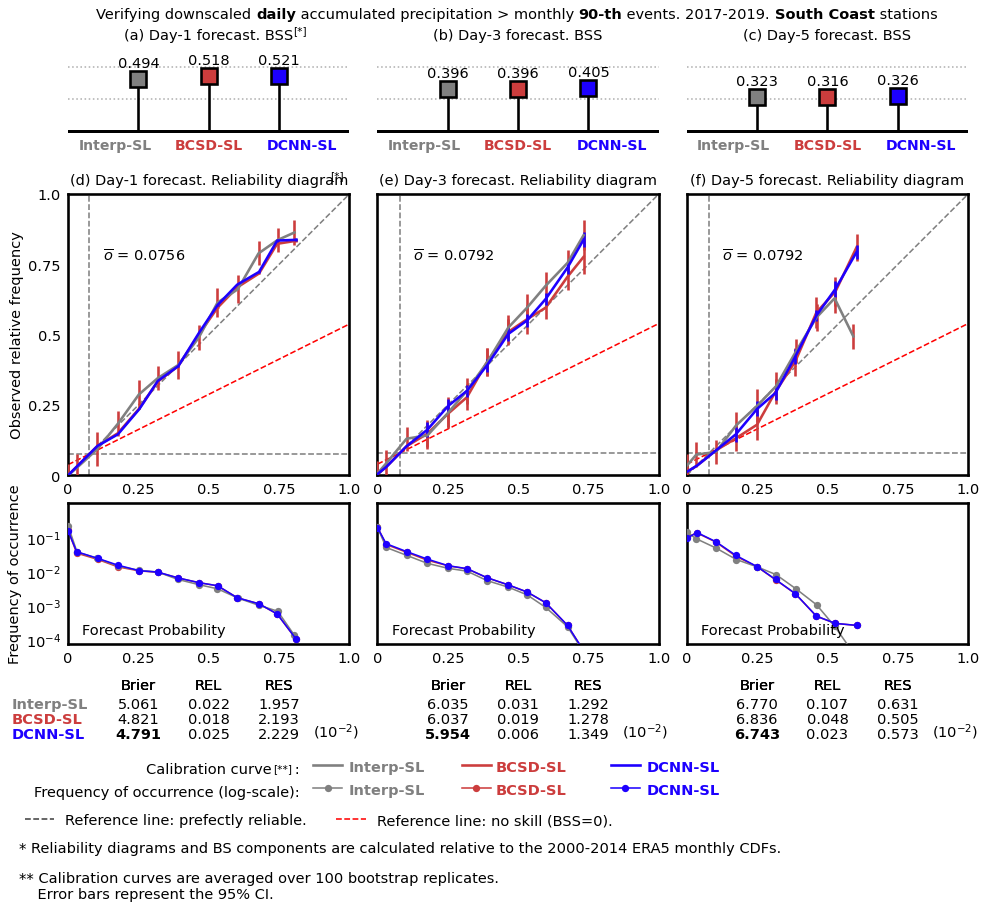

In [12]:
fig = plt.figure(figsize=(12, 12/(3.2)*2.65), dpi=dpi_)


handle_title = []
handle_lines = []
handle_marker = []

gs = gridspec.GridSpec(7, 5, height_ratios=[0.45, 0.15, 1, 0.1, 0.5, 0.15, 0.3], width_ratios=[1, 0.1, 1, 0.1, 1])

YLIM = [7.5e-5, 1e0]
YLAB = [1e-4, 1e-3, 1e-2, 1e-1]

# no skill line
fake_x = np.linspace(0, 1, 100)
fake_y = [0.5*fake_x + 0.5*o_bar[0], 0.5*fake_x + 0.5*o_bar[1], 0.5*fake_x + 0.5*o_bar[2]]

AX_bs = []
AX_re = [] # reliability curve axis
AX_hi = [] # freq of use axis
AX_da = [] # data axis

for j in [0, 2, 4]:
    AX_bs.append(plt.subplot(gs[0, j]))
    AX_re.append(plt.subplot(gs[2, j]))
    AX_hi.append(plt.subplot(gs[4, j]))
    AX_da.append(plt.subplot(gs[6, j]))

plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

for i, ax in enumerate(AX_re):
    ax = gu.ax_decorate_box(ax)
    ax.plot(fake_x, fake_x, linewidth=1.5, linestyle='--', color='0.5')
    ax.plot(fake_x, fake_y[i], linewidth=1.5, linestyle='--', color='r')

    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_aspect('equal')

for i, ax in enumerate(AX_da):
    ax.set_axis_off()

for i, ax in enumerate(AX_hi):
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_yscale('log')
    ax.set_ylim(YLIM)
    ax.set_yticks(YLAB)

    ax.text(0.05, 0.05, 'Forecast Probability', ha='left', va='bottom', fontsize=14, transform=ax.transAxes)
        
AX_re[0].set_ylabel('Observed relative frequency', fontsize=14)
AX_hi[0].set_ylabel('Frequency of occurrence', fontsize=14)
AX_re[0].tick_params(axis="both", which="both", labelleft=True)
AX_hi[0].tick_params(axis="both", which="both", labelleft=True)

methods = ['scnn', 'bcsd', 'dcnn']
Z = [5, 4, 5, 4, 4]
labels = ['Interp-SL', 'BCSD-SL', 'DCNN-SL']
label_ = ['                 ',
          '                 ',
          '                 ']

bar_gap = 1/4
text_gap = 1/3

YLIM_bs = [-0.2, 1.0]
YTICKS_bs = np.array([0.0, 0.3, 0.6])

titles_bs = ['(a) Day-1 forecast. BSS', 
             '(b) Day-3 forecast. BSS', 
             '(c) Day-5 forecast. BSS']
titles_re = ['(d) Day-1 forecast. Reliability diagram', 
             '(e) Day-3 forecast. Reliability diagram', 
             '(f) Day-5 forecast. Reliability diagram']

for i in range(3):
    
    ax_bs = AX_bs[i]
    ax_bs.text(0.5, 0.975, titles_bs[i], ha='center', va='top', fontsize=14, transform=ax_bs.transAxes)
    ax_bs = gu.ax_decorate(ax_bs, left_flag=False, bottom_flag=False)
    ax_bs.grid(linestyle=":", linewidth=1.5)
    ax_bs.xaxis.grid(False)    
    ax_bs.spines["left"].set_visible(False)
    ax_bs.set_xlim([0, 1])
    ax_bs.set_ylim(YLIM_bs)
    ax_bs.set_yticks(YTICKS_bs)
    
    d_bs = 0.125*(YLIM_bs[1] - YLIM_bs[0])

    for m, method in enumerate(['scnn', 'bcsd', 'dcnn']):
            
        x_ = np.array([bar_gap+bar_gap*m,])
        x_text = 0.5*text_gap + text_gap*m
        bs_ = 1-10*np.array([BS_3c['{}'.format(method)][i],])
        
        marker_p, stem_p, base_p = ax_bs.stem(x_, bs_, bottom=0.0, use_line_collection=True)
        plt.setp(marker_p, marker='s', ms=15, mew=2.5, mec='k', mfc=KW[method]['color'], zorder=4)
        plt.setp(stem_p, linewidth=2.5, color='k')
        
        ax_bs.text(x_, bs_+d_bs, '{:.3f}'.format(bs_[0]), va='center', ha='center', fontsize=14)
        
        ax_bs.axhline(y=0.0, xmin=0, xmax=1, linewidth=2.5, color='k')
        ax_bs.text(x_text, -0.2, labels[m], ha='center', va='bottom', color=C[m], 
                  fontsize=13.5, fontweight='bold')

for i, ind in enumerate([0, 1, 2]):
    
    AX_re[i].text(0.5, 1.025, titles_re[i], fontsize=14, ha='center', va='bottom', transform=AX_re[i].transAxes)
    AX_re[i].axvline(x=o_bar[ind], ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
    AX_re[i].axhline(y=o_bar[ind], xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
    
    for m, method in enumerate(methods):
        
        temp_p = PLOT['{}_pm'.format(method)][ind, :]
        temp_f = PLOT['{}_fm'.format(method)][ind, :]
        temp_95th = PLOT['{}_fs'.format(method)][ind, :]
        
        temp_ux = temp_p
        temp_uy = USE['{}'.format(method)][ind, :]
        
        AX_re[i].errorbar(temp_p, temp_f, yerr=temp_95th/8.0, **KW[method], zorder=Z[m])
        
        handle_lines += AX_hi[i].plot(temp_ux, temp_uy, color=C[m], linestyle=LS[m], linewidth=1.5, 
                                      marker='o', ms=7, mew=0, mfc=C[m], zorder=Z[m]-2, label=label_[m])

AX_re[0].text(0.125, 0.75, '$\overline{o}$ = 0.0756', ha='left', va='bottom', fontsize=14)
AX_re[1].text(0.125, 0.75, '$\overline{o}$ = 0.0792', ha='left', va='bottom', fontsize=14)
AX_re[2].text(0.125, 0.75, '$\overline{o}$ = 0.0792', ha='left', va='bottom', fontsize=14)

ax_t1 = fig.add_axes([0.5*(3.2-3.0)/3.2, 1.0, (3.0/3.2), 0.025])
ax_t1.set_axis_off()
handle_title += gu.string_partial_format(fig, ax_t1, 0, 1.0, 'left', 'top', 
                                         ['Verifying downscaled ', 'daily', 
                                          ' accumulated precipitation > monthly ', 
                                          '90-th', ' events. 2017-2019. ', 'South Coast', ' stations'], 
                                         ['k',]*7, [14,]*7, ['normal', 'bold', 'normal', 'bold', 
                                                             'normal', 'bold', 'normal'])

AX_bs[0].text(0.85, 1.0, '[*]', ha='right', va='top', fontsize=10, transform=AX_bs[0].transAxes);
AX_re[0].text(0.98, 1.085, '[*]', ha='right', va='top', fontsize=10, transform=AX_re[0].transAxes);

for handle in handle_title:
    handle.set_bbox(dict(facecolor='w', pad=0, edgecolor='none', zorder=2))

loc_y = [0.708, 0.53, 0.352, 0.173, 0.,]

table_heads = ['Brier', 'REL', 'RES']
locx_heads = [0.25, 0.5, 0.75]

for i, ind in enumerate([0, 1, 2]):
    
    AX_da[i].text(1.035, 0.5-0.035, r'($10^{-2}$)', ha='right', va='center', fontsize=14, transform=AX_da[i].transAxes)
    
    for m, method in enumerate(methods):
        
        if method == 'dcnn':
            fw = 'bold'
        else:
            fw = 'normal'
        
        for j in range(3):
            AX_da[i].text(locx_heads[j], 0.93, table_heads[j], ha='center', va='bottom', 
                             fontsize=14, transform=AX_da[i].transAxes)

        AX_da[i].text(locx_heads[0], loc_y[m], '{:.3f}'.format(1e2*BS['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, fontweight=fw, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[1], loc_y[m], '{:.3f}'.format(1e2*REL['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[2], loc_y[m], '{:.3f}'.format(1e2*RES['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)

for m, method in enumerate(methods):
    AX_da[0].text(-0.2, loc_y[m], labels[m], ha='left', va='bottom', color=C[m], 
                  fontsize=14, fontweight='bold', transform=AX_da[0].transAxes)

handle_errbar = []
handle_errbar.append(mlines.Line2D([], [], label=label_[0], **kw_lines['scnn']))
handle_errbar.append(mlines.Line2D([], [], label=label_[1], **kw_lines['bcsd']))
handle_errbar.append(mlines.Line2D([], [], label=label_[2], **kw_lines['dcnn']))

ax_box = fig.add_axes([-0.0, -0.085+0.04, 0.75, 0.0625])
ax_box.set_axis_off()

ax_lw1 = inset_axes(ax_box, height='50%', width='35%', borderpad=0, loc=2)
ax_lw2 = inset_axes(ax_box, height='50%', width='35%', borderpad=0, loc=3)
ax_lg1 = inset_axes(ax_box, height='50%', width='65%', borderpad=0, loc=1)
ax_lg2 = inset_axes(ax_box, height='50%', width='65%', borderpad=0, loc=4)

ax_lw1.text(1, 0.5, 'Calibration curve     : ', ha='right', va='center', fontsize=14, transform=ax_lw1.transAxes);
ax_lw2.text(1, 0.5, 'Frequency of occurrence (log-scale): ', ha='right', va='center', fontsize=14, transform=ax_lw2.transAxes);
ax_lw1.text(0.95, 0.55, '[**]', ha='right', va='center', fontsize=10, transform=ax_lw1.transAxes);

LG = ax_lg1.legend(handles=handle_errbar, bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG.get_frame().set_facecolor('none')
LG.get_frame().set_linewidth(0)
LG.get_frame().set_alpha(1.0)

LG1 = ax_lg2.legend(handles=handle_lines[0:3], bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

ax_lg1.text(0.1, 0.9, 'Interp-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.435, 0.9, 'BCSD-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcsd']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.78, 0.9, 'DCNN-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['dcnn']['color'], transform=ax_lg1.transAxes)

ax_lg2.text(0.1, 0.9, 'Interp-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.435, 0.9, 'BCSD-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcsd']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.78, 0.9, 'DCNN-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['dcnn']['color'], transform=ax_lg2.transAxes)

ax_lw1.set_axis_off()
ax_lg1.set_axis_off()
ax_lw2.set_axis_off()
ax_lg2.set_axis_off()

ax_lg3 = fig.add_axes([-0.055, -0.135+0.045, 0.675, 0.05])
ax_lg3.set_axis_off()
handle_refline = []
handle_refline.append(mlines.Line2D([], [], label='Reference line: prefectly reliable.', linestyle='--', color='0.25', linewidth=1.5))
handle_refline.append(mlines.Line2D([], [], label='Reference line: no skill (BSS=0).', linestyle='--', color='r', linewidth=1.5))
LG2 = ax_lg3.legend(handles=handle_refline, 
                    bbox_to_anchor=(1, 1), ncol=2, prop={'size':14}, fancybox=False);
LG2.get_frame().set_facecolor('none')
LG2.get_frame().set_linewidth(0)
LG2.get_frame().set_alpha(1.0)

ax_w1 = fig.add_axes([-0.055, -0.135-0.05+0.065, 1.065, 0.025])
ax_w1.set_axis_off()
ax_w1.text(0, 1, '* Reliability diagrams and BS components are calculated relative to the 2000-2014 ERA5 monthly CDFs.', 
          ha='left', va='top', fontsize=14, transform=ax_w1.transAxes);

ax_w2 = fig.add_axes([-0.055, -0.2-0.05+0.065, 1.065, 0.05])
ax_w2.set_axis_off()
ax_w2.text(0, 1, '** Calibration curves are averaged over 100 bootstrap replicates.\n    Error bars represent the 95% CI.', 
          ha='left', va='top', fontsize=14, transform=ax_w2.transAxes);

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'DSCALE_Calib_SouthCoast.png', format='png', **fig_keys)

## Southern Interior

In [13]:
calib_dict = np.load(save_dir+'DSCALE_Calib_BCH_loc1.npy', allow_pickle=True)[()]
PLOT = calib_dict['PLOT']
BS = calib_dict['BS_3c']
BS_3c = calib_dict['BS_3c']
USE = calib_dict['USE']
o_bar = calib_dict['o_bar']
REL = calib_dict['REL']
RES = calib_dict['RES']

USE, PLOT = filter_single_point(USE, PLOT)
print('obar: {}, {}, {}'.format(o_bar[0], o_bar[1], o_bar[2]))

obar: 0.10313825950172625, 0.10357201486637324, 0.10120071845541515


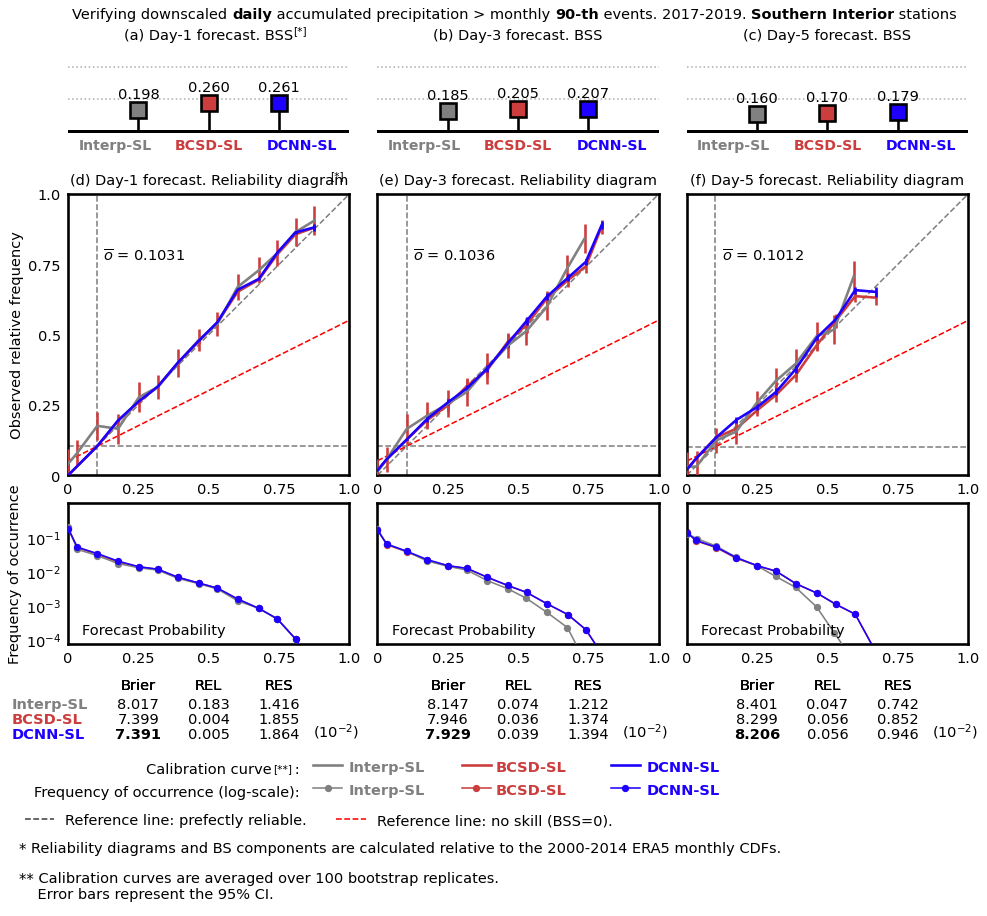

In [14]:
fig = plt.figure(figsize=(12, 12/(3.2)*2.65), dpi=dpi_)


handle_title = []
handle_lines = []
handle_marker = []

gs = gridspec.GridSpec(7, 5, height_ratios=[0.45, 0.15, 1, 0.1, 0.5, 0.15, 0.3], width_ratios=[1, 0.1, 1, 0.1, 1])

YLIM = [7.5e-5, 1e0]
YLAB = [1e-4, 1e-3, 1e-2, 1e-1]

# no skill line
fake_x = np.linspace(0, 1, 100)
fake_y = [0.5*fake_x + 0.5*o_bar[0], 0.5*fake_x + 0.5*o_bar[1], 0.5*fake_x + 0.5*o_bar[2]]

AX_bs = []
AX_re = [] # reliability curve axis
AX_hi = [] # freq of use axis
AX_da = [] # data axis

for j in [0, 2, 4]:
    AX_bs.append(plt.subplot(gs[0, j]))
    AX_re.append(plt.subplot(gs[2, j]))
    AX_hi.append(plt.subplot(gs[4, j]))
    AX_da.append(plt.subplot(gs[6, j]))

plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

for i, ax in enumerate(AX_re):
    ax = gu.ax_decorate_box(ax)
    ax.plot(fake_x, fake_x, linewidth=1.5, linestyle='--', color='0.5')
    ax.plot(fake_x, fake_y[i], linewidth=1.5, linestyle='--', color='r')

    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_aspect('equal')

for i, ax in enumerate(AX_da):
    ax.set_axis_off()

for i, ax in enumerate(AX_hi):
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_yscale('log')
    ax.set_ylim(YLIM)
    ax.set_yticks(YLAB)
    
    ax.text(0.05, 0.05, 'Forecast Probability', ha='left', va='bottom', fontsize=14, transform=ax.transAxes)
        
AX_re[0].set_ylabel('Observed relative frequency', fontsize=14)
AX_hi[0].set_ylabel('Frequency of occurrence', fontsize=14)
AX_re[0].tick_params(axis="both", which="both", labelleft=True)
AX_hi[0].tick_params(axis="both", which="both", labelleft=True)

methods = ['scnn', 'bcsd', 'dcnn']
Z = [5, 4, 5, 4, 4]
labels = ['Interp-SL', 'BCSD-SL', 'DCNN-SL']
label_ = ['                 ',
          '                 ',
          '                 ']

bar_gap = 1/4
text_gap = 1/3

YLIM_bs = [-0.2, 1.0]
YTICKS_bs = np.array([0.0, 0.3, 0.6])

titles_bs = ['(a) Day-1 forecast. BSS', 
             '(b) Day-3 forecast. BSS', 
             '(c) Day-5 forecast. BSS']

titles_re = ['(d) Day-1 forecast. Reliability diagram', 
             '(e) Day-3 forecast. Reliability diagram', 
             '(f) Day-5 forecast. Reliability diagram']

for i in range(3):
    
    ax_bs = AX_bs[i]
    ax_bs.text(0.5, 0.975, titles_bs[i], ha='center', va='top', fontsize=14, transform=ax_bs.transAxes)
    ax_bs = gu.ax_decorate(ax_bs, left_flag=False, bottom_flag=False)
    ax_bs.grid(linestyle=":", linewidth=1.5)
    ax_bs.xaxis.grid(False)    
    ax_bs.spines["left"].set_visible(False)
    ax_bs.set_xlim([0, 1])
    ax_bs.set_ylim(YLIM_bs)
    ax_bs.set_yticks(YTICKS_bs)
    
    d_bs = 0.125*(YLIM_bs[1] - YLIM_bs[0])

    for m, method in enumerate(['scnn', 'bcsd', 'dcnn']):
            
        x_ = np.array([bar_gap+bar_gap*m,])
        x_text = 0.5*text_gap + text_gap*m
        bs_ = 1-10*np.array([BS_3c['{}'.format(method)][i],])
        
        marker_p, stem_p, base_p = ax_bs.stem(x_, bs_, bottom=0.0, use_line_collection=True)
        plt.setp(marker_p, marker='s', ms=15, mew=2.5, mec='k', mfc=KW[method]['color'], zorder=4)
        plt.setp(stem_p, linewidth=2.5, color='k')
        
        ax_bs.text(x_, bs_+d_bs, '{:.3f}'.format(bs_[0]), va='center', ha='center', fontsize=14)
        
        ax_bs.axhline(y=0.0, xmin=0, xmax=1, linewidth=2.5, color='k')
        ax_bs.text(x_text, -0.2, labels[m], ha='center', va='bottom', color=C[m], 
                  fontsize=13.5, fontweight='bold')

for i, ind in enumerate([0, 1, 2]):
    
    AX_re[i].text(0.5, 1.025, titles_re[i], fontsize=14, ha='center', va='bottom', transform=AX_re[i].transAxes)
    AX_re[i].axvline(x=o_bar[ind], ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
    AX_re[i].axhline(y=o_bar[ind], xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
    
    for m, method in enumerate(methods):
        
        temp_p = PLOT['{}_pm'.format(method)][ind, :]
        temp_f = PLOT['{}_fm'.format(method)][ind, :]
        temp_95th = PLOT['{}_fs'.format(method)][ind, :]
        
        temp_ux = temp_p
        temp_uy = USE['{}'.format(method)][ind, :]
        
        AX_re[i].errorbar(temp_p, temp_f, yerr=temp_95th/8.0, **KW[method], zorder=Z[m])
        
        handle_lines += AX_hi[i].plot(temp_ux, temp_uy, color=C[m], linestyle=LS[m], linewidth=1.5, 
                                      marker='o', ms=7, mew=0, mfc=C[m], zorder=Z[m]-2, label=label_[m])
        
AX_re[0].text(0.125, 0.75, '$\overline{o}$ = 0.1031', ha='left', va='bottom', fontsize=14)
AX_re[1].text(0.125, 0.75, '$\overline{o}$ = 0.1036', ha='left', va='bottom', fontsize=14)
AX_re[2].text(0.125, 0.75, '$\overline{o}$ = 0.1012', ha='left', va='bottom', fontsize=14)

# ax_t1 = fig.add_axes([0.5*(3.2-2.75)/3.2, 1.0, (2.75/3.2), 0.045])
# ax_t1.set_axis_off()
# handle_title += gu.string_partial_format(fig, ax_t1, 0, 1.0, 'left', 'top', 
#                                          ['Reliability diagrams    for precipitation rate > monthly ', '90-th', 
#                                          ' events. 2017-2019. ', 'South Coast', ' stations'], 
#                                          ['k',]*5, [14,]*5, ['normal', 'bold', 'normal', 'bold', 'normal'])

ax_t1 = fig.add_axes([0.5*(3.2-3.17)/3.2, 1.0, (3.17/3.2), 0.025])
ax_t1.set_axis_off()
handle_title += gu.string_partial_format(fig, ax_t1, 0, 1.0, 'left', 'top', 
                                         ['Verifying downscaled ', 'daily', 
                                          ' accumulated precipitation > monthly ', 
                                          '90-th', ' events. 2017-2019. ', 'Southern Interior', ' stations'], 
                                         ['k',]*7, [14,]*7, ['normal', 'bold', 'normal', 'bold', 
                                                             'normal', 'bold', 'normal'])

AX_bs[0].text(0.85, 1.0, '[*]', ha='right', va='top', fontsize=10, transform=AX_bs[0].transAxes);
AX_re[0].text(0.98, 1.085, '[*]', ha='right', va='top', fontsize=10, transform=AX_re[0].transAxes);

for handle in handle_title:
    handle.set_bbox(dict(facecolor='w', pad=0, edgecolor='none', zorder=2))

loc_y = [0.708, 0.53, 0.352, 0.173, 0.,]

table_heads = ['Brier', 'REL', 'RES']
locx_heads = [0.25, 0.5, 0.75]

for i, ind in enumerate([0, 1, 2]):
    
    AX_da[i].text(1.035, 0.5-0.035, r'($10^{-2}$)', ha='right', va='center', fontsize=14, transform=AX_da[i].transAxes)
    
    for m, method in enumerate(methods):
        
        if method == 'dcnn':
            fw = 'bold'
        else:
            fw = 'normal'
        
        for j in range(3):
            AX_da[i].text(locx_heads[j], 0.93, table_heads[j], ha='center', va='bottom', 
                             fontsize=14, transform=AX_da[i].transAxes)

        AX_da[i].text(locx_heads[0], loc_y[m], '{:.3f}'.format(1e2*BS['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, fontweight=fw, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[1], loc_y[m], '{:.3f}'.format(1e2*REL['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[2], loc_y[m], '{:.3f}'.format(1e2*RES['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)

for m, method in enumerate(methods):
    AX_da[0].text(-0.2, loc_y[m], labels[m], ha='left', va='bottom', color=C[m], 
                  fontsize=14, fontweight='bold', transform=AX_da[0].transAxes)

handle_errbar = []
handle_errbar.append(mlines.Line2D([], [], label=label_[0], **kw_lines['scnn']))
handle_errbar.append(mlines.Line2D([], [], label=label_[1], **kw_lines['bcsd']))
handle_errbar.append(mlines.Line2D([], [], label=label_[2], **kw_lines['dcnn']))

ax_box = fig.add_axes([0, -0.085+0.04, 0.75, 0.0625])
ax_box.set_axis_off()

ax_lw1 = inset_axes(ax_box, height='50%', width='35%', borderpad=0, loc=2)
ax_lw2 = inset_axes(ax_box, height='50%', width='35%', borderpad=0, loc=3)
ax_lg1 = inset_axes(ax_box, height='50%', width='65%', borderpad=0, loc=1)
ax_lg2 = inset_axes(ax_box, height='50%', width='65%', borderpad=0, loc=4)

ax_lw1.text(1, 0.5, 'Calibration curve     : ', ha='right', va='center', fontsize=14, transform=ax_lw1.transAxes);
ax_lw2.text(1, 0.5, 'Frequency of occurrence (log-scale): ', ha='right', va='center', fontsize=14, transform=ax_lw2.transAxes);
ax_lw1.text(0.95, 0.55, '[**]', ha='right', va='center', fontsize=10, transform=ax_lw1.transAxes);

LG = ax_lg1.legend(handles=handle_errbar, bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG.get_frame().set_facecolor('none')
LG.get_frame().set_linewidth(0)
LG.get_frame().set_alpha(1.0)

LG1 = ax_lg2.legend(handles=handle_lines[0:3], bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

ax_lg1.text(0.1, 0.9, 'Interp-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.435, 0.9, 'BCSD-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcsd']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.78, 0.9, 'DCNN-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['dcnn']['color'], transform=ax_lg1.transAxes)

ax_lg2.text(0.1, 0.9, 'Interp-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.435, 0.9, 'BCSD-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcsd']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.78, 0.9, 'DCNN-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['dcnn']['color'], transform=ax_lg2.transAxes)

ax_lw1.set_axis_off()
ax_lg1.set_axis_off()
ax_lw2.set_axis_off()
ax_lg2.set_axis_off()

ax_lg3 = fig.add_axes([-0.055, -0.135+0.045, 0.675, 0.05])
ax_lg3.set_axis_off()
handle_refline = []
handle_refline.append(mlines.Line2D([], [], label='Reference line: prefectly reliable.', linestyle='--', color='0.25', linewidth=1.5))
handle_refline.append(mlines.Line2D([], [], label='Reference line: no skill (BSS=0).', linestyle='--', color='r', linewidth=1.5))
LG2 = ax_lg3.legend(handles=handle_refline, 
                    bbox_to_anchor=(1, 1), ncol=2, prop={'size':14}, fancybox=False);
LG2.get_frame().set_facecolor('none')
LG2.get_frame().set_linewidth(0)
LG2.get_frame().set_alpha(1.0)

ax_w1 = fig.add_axes([-0.055, -0.135-0.05+0.065, 1.065, 0.025])
ax_w1.set_axis_off()
ax_w1.text(0, 1, '* Reliability diagrams and BS components are calculated relative to the 2000-2014 ERA5 monthly CDFs.', 
          ha='left', va='top', fontsize=14, transform=ax_w1.transAxes);

ax_w2 = fig.add_axes([-0.055, -0.2-0.05+0.065, 1.065, 0.05])
ax_w2.set_axis_off()
ax_w2.text(0, 1, '** Calibration curves are averaged over 100 bootstrap replicates.\n    Error bars represent the 95% CI.', 
          ha='left', va='top', fontsize=14, transform=ax_w2.transAxes);

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'DSCALE_Calib_southern.png', format='png', **fig_keys)

## Northeast BC

In [15]:
calib_dict = np.load(save_dir+'DSCALE_Calib_BCH_loc2.npy', allow_pickle=True)[()]
PLOT = calib_dict['PLOT']
BS = calib_dict['BS_3c']
BS_3c = calib_dict['BS_3c']
USE = calib_dict['USE']
o_bar = calib_dict['o_bar']
REL = calib_dict['REL']
RES = calib_dict['RES']

USE, PLOT = filter_single_point(USE, PLOT)
print('obar: {}, {}, {}'.format(o_bar[0], o_bar[1], o_bar[2]))

obar: 0.10655570128562282, 0.10231562050352297, 0.10413478394651292


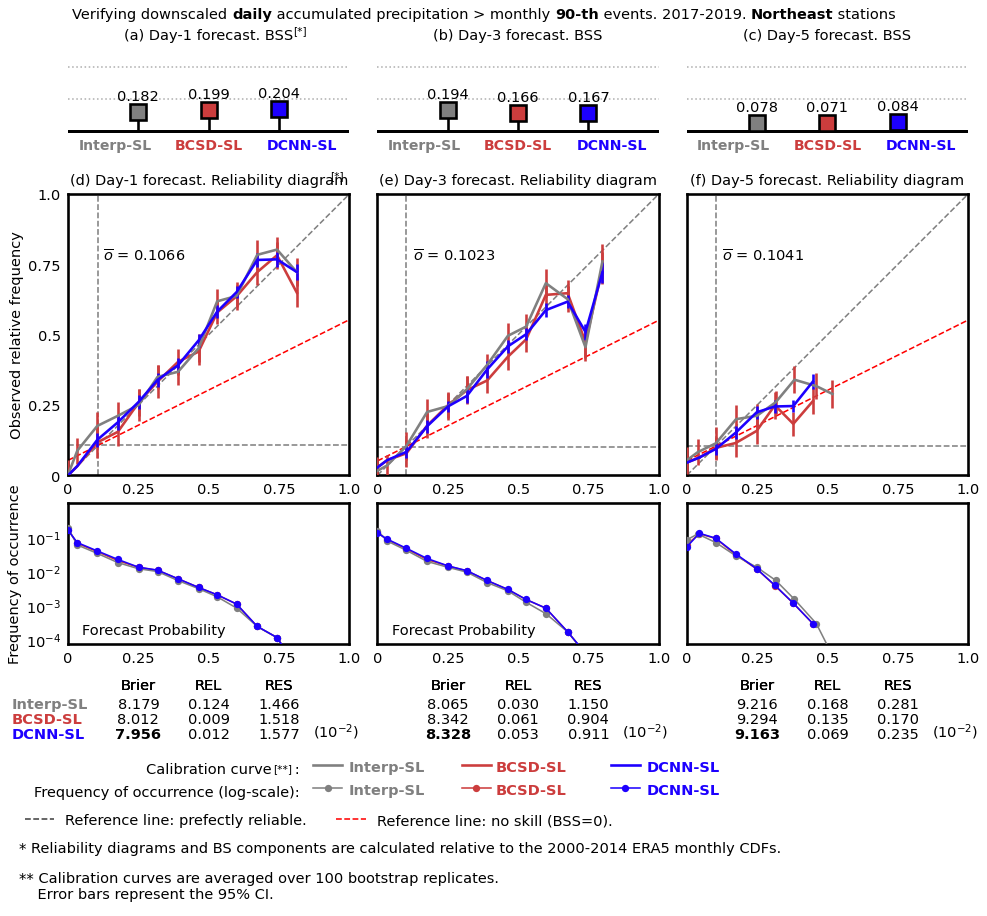

In [16]:
fig = plt.figure(figsize=(12, 12/(3.2)*2.65), dpi=dpi_)

handle_title = []
handle_lines = []
handle_marker = []

gs = gridspec.GridSpec(7, 5, height_ratios=[0.45, 0.15, 1, 0.1, 0.5, 0.15, 0.3], width_ratios=[1, 0.1, 1, 0.1, 1])

YLIM = [7.5e-5, 1e0]
YLAB = [1e-4, 1e-3, 1e-2, 1e-1]

# no skill line
fake_x = np.linspace(0, 1, 100)
fake_y = [0.5*fake_x + 0.5*o_bar[0], 0.5*fake_x + 0.5*o_bar[1], 0.5*fake_x + 0.5*o_bar[2]]

AX_bs = []
AX_re = [] # reliability curve axis
AX_hi = [] # freq of use axis
AX_da = [] # data axis

for j in [0, 2, 4]:
    AX_bs.append(plt.subplot(gs[0, j]))
    AX_re.append(plt.subplot(gs[2, j]))
    AX_hi.append(plt.subplot(gs[4, j]))
    AX_da.append(plt.subplot(gs[6, j]))

plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

for i, ax in enumerate(AX_re):
    ax = gu.ax_decorate_box(ax)
    ax.plot(fake_x, fake_x, linewidth=1.5, linestyle='--', color='0.5')
    ax.plot(fake_x, fake_y[i], linewidth=1.5, linestyle='--', color='r')

    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_aspect('equal')

for i, ax in enumerate(AX_da):
    ax.set_axis_off()

for i, ax in enumerate(AX_hi):
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_yscale('log')
    ax.set_ylim(YLIM)
    ax.set_yticks(YLAB)
    if i < 2:
        ax.text(0.05, 0.05, 'Forecast Probability', ha='left', va='bottom', fontsize=14, transform=ax.transAxes)
        
AX_re[0].set_ylabel('Observed relative frequency', fontsize=14)
AX_hi[0].set_ylabel('Frequency of occurrence', fontsize=14)
AX_re[0].tick_params(axis="both", which="both", labelleft=True)
AX_hi[0].tick_params(axis="both", which="both", labelleft=True)

methods = ['scnn', 'bcsd', 'dcnn']
Z = [5, 4, 5, 4, 4]
labels = ['Interp-SL', 'BCSD-SL', 'DCNN-SL']
label_ = ['                 ',
          '                 ',
          '                 ']

bar_gap = 1/4
text_gap = 1/3

YLIM_bs = [-0.2, 1.0]
YTICKS_bs = np.array([0.0, 0.3, 0.6])

titles_bs = ['(a) Day-1 forecast. BSS', 
             '(b) Day-3 forecast. BSS', 
             '(c) Day-5 forecast. BSS']

titles_re = ['(d) Day-1 forecast. Reliability diagram', 
             '(e) Day-3 forecast. Reliability diagram', 
             '(f) Day-5 forecast. Reliability diagram']

for i in range(3):
    
    ax_bs = AX_bs[i]
    ax_bs.text(0.5, 0.975, titles_bs[i], ha='center', va='top', fontsize=14, transform=ax_bs.transAxes)
    ax_bs = gu.ax_decorate(ax_bs, left_flag=False, bottom_flag=False)
    ax_bs.grid(linestyle=":", linewidth=1.5)
    ax_bs.xaxis.grid(False)    
    ax_bs.spines["left"].set_visible(False)
    ax_bs.set_xlim([0, 1])
    ax_bs.set_ylim(YLIM_bs)
    ax_bs.set_yticks(YTICKS_bs)
    
    d_bs = 0.125*(YLIM_bs[1] - YLIM_bs[0])

    for m, method in enumerate(['scnn', 'bcsd', 'dcnn']):
            
        x_ = np.array([bar_gap+bar_gap*m,])
        x_text = 0.5*text_gap + text_gap*m
        bs_ = 1-10*np.array([BS_3c['{}'.format(method)][i],])
        
        marker_p, stem_p, base_p = ax_bs.stem(x_, bs_, bottom=0.0, use_line_collection=True)
        plt.setp(marker_p, marker='s', ms=15, mew=2.5, mec='k', mfc=KW[method]['color'], zorder=4)
        plt.setp(stem_p, linewidth=2.5, color='k')
        
        ax_bs.text(x_, bs_+d_bs, '{:.3f}'.format(bs_[0]), va='center', ha='center', fontsize=14)
        
        ax_bs.axhline(y=0.0, xmin=0, xmax=1, linewidth=2.5, color='k')
        ax_bs.text(x_text, -0.2, labels[m], ha='center', va='bottom', color=C[m], 
                  fontsize=13.5, fontweight='bold')

for i, ind in enumerate([0, 1, 2]):
    
    AX_re[i].text(0.5, 1.025, titles_re[i], fontsize=14, ha='center', va='bottom', transform=AX_re[i].transAxes)
    AX_re[i].axvline(x=o_bar[ind], ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
    AX_re[i].axhline(y=o_bar[ind], xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
    
    for m, method in enumerate(methods):
        
        temp_p = PLOT['{}_pm'.format(method)][ind, :]
        temp_f = PLOT['{}_fm'.format(method)][ind, :]
        temp_95th = PLOT['{}_fs'.format(method)][ind, :]
        
        temp_ux = temp_p
        temp_uy = USE['{}'.format(method)][ind, :]
        
        AX_re[i].errorbar(temp_p, temp_f, yerr=temp_95th/8.0, **KW[method], zorder=Z[m])
        
        handle_lines += AX_hi[i].plot(temp_ux, temp_uy, color=C[m], linestyle=LS[m], linewidth=1.5, 
                                      marker='o', ms=7, mew=0, mfc=C[m], zorder=Z[m]-2, label=label_[m])

AX_re[0].text(0.125, 0.75, '$\overline{o}$ = 0.1066', ha='left', va='bottom', fontsize=14)
AX_re[1].text(0.125, 0.75, '$\overline{o}$ = 0.1023', ha='left', va='bottom', fontsize=14)
AX_re[2].text(0.125, 0.75, '$\overline{o}$ = 0.1041', ha='left', va='bottom', fontsize=14)

ax_t1 = fig.add_axes([0.5*(3.2-3.17)/3.2, 1.0, (3.17/3.2), 0.025])
ax_t1.set_axis_off()
handle_title += gu.string_partial_format(fig, ax_t1, 0, 1.0, 'left', 'top', 
                                         ['Verifying downscaled ', 'daily', 
                                          ' accumulated precipitation > monthly ', 
                                          '90-th', ' events. 2017-2019. ', 'Northeast', ' stations'], 
                                         ['k',]*7, [14,]*7, ['normal', 'bold', 'normal', 'bold', 
                                                             'normal', 'bold', 'normal'])

AX_bs[0].text(0.85, 1.0, '[*]', ha='right', va='top', fontsize=10, transform=AX_bs[0].transAxes);
AX_re[0].text(0.98, 1.085, '[*]', ha='right', va='top', fontsize=10, transform=AX_re[0].transAxes);

for handle in handle_title:
    handle.set_bbox(dict(facecolor='w', pad=0, edgecolor='none', zorder=2))

loc_y = [0.708, 0.53, 0.352, 0.173, 0.,]

table_heads = ['Brier', 'REL', 'RES']
locx_heads = [0.25, 0.5, 0.75]

for i, ind in enumerate([0, 1, 2]):
    
    AX_da[i].text(1.035, 0.5-0.035, r'($10^{-2}$)', ha='right', va='center', fontsize=14, transform=AX_da[i].transAxes)
    
    for m, method in enumerate(methods):
        
        if method == 'dcnn':
            fw = 'bold'
        else:
            fw = 'normal'
        
        for j in range(3):
            AX_da[i].text(locx_heads[j], 0.93, table_heads[j], ha='center', va='bottom', 
                             fontsize=14, transform=AX_da[i].transAxes)

        AX_da[i].text(locx_heads[0], loc_y[m], '{:.3f}'.format(1e2*BS['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, fontweight=fw, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[1], loc_y[m], '{:.3f}'.format(1e2*REL['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[2], loc_y[m], '{:.3f}'.format(1e2*RES['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)

for m, method in enumerate(methods):
    AX_da[0].text(-0.2, loc_y[m], labels[m], ha='left', va='bottom', color=C[m], 
                  fontsize=14, fontweight='bold', transform=AX_da[0].transAxes)

handle_errbar = []
handle_errbar.append(mlines.Line2D([], [], label=label_[0], **kw_lines['scnn']))
handle_errbar.append(mlines.Line2D([], [], label=label_[1], **kw_lines['bcsd']))
handle_errbar.append(mlines.Line2D([], [], label=label_[2], **kw_lines['dcnn']))

ax_box = fig.add_axes([0, -0.085+0.04, 0.75, 0.0625])
ax_box.set_axis_off()

ax_lw1 = inset_axes(ax_box, height='50%', width='35%', borderpad=0, loc=2)
ax_lw2 = inset_axes(ax_box, height='50%', width='35%', borderpad=0, loc=3)
ax_lg1 = inset_axes(ax_box, height='50%', width='65%', borderpad=0, loc=1)
ax_lg2 = inset_axes(ax_box, height='50%', width='65%', borderpad=0, loc=4)

ax_lw1.text(1, 0.5, 'Calibration curve     : ', ha='right', va='center', fontsize=14, transform=ax_lw1.transAxes);
ax_lw2.text(1, 0.5, 'Frequency of occurrence (log-scale): ', ha='right', va='center', fontsize=14, transform=ax_lw2.transAxes);
ax_lw1.text(0.95, 0.55, '[**]', ha='right', va='center', fontsize=10, transform=ax_lw1.transAxes);

LG = ax_lg1.legend(handles=handle_errbar, bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG.get_frame().set_facecolor('none')
LG.get_frame().set_linewidth(0)
LG.get_frame().set_alpha(1.0)

LG1 = ax_lg2.legend(handles=handle_lines[0:3], bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

ax_lg1.text(0.1, 0.9, 'Interp-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.435, 0.9, 'BCSD-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcsd']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.78, 0.9, 'DCNN-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['dcnn']['color'], transform=ax_lg1.transAxes)

ax_lg2.text(0.1, 0.9, 'Interp-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.435, 0.9, 'BCSD-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcsd']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.78, 0.9, 'DCNN-SL', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['dcnn']['color'], transform=ax_lg2.transAxes)

ax_lw1.set_axis_off()
ax_lg1.set_axis_off()
ax_lw2.set_axis_off()
ax_lg2.set_axis_off()

ax_lg3 = fig.add_axes([-0.055, -0.135+0.045, 0.675, 0.05])
ax_lg3.set_axis_off()
handle_refline = []
handle_refline.append(mlines.Line2D([], [], label='Reference line: prefectly reliable.', linestyle='--', color='0.25', linewidth=1.5))
handle_refline.append(mlines.Line2D([], [], label='Reference line: no skill (BSS=0).', linestyle='--', color='r', linewidth=1.5))
LG2 = ax_lg3.legend(handles=handle_refline, 
                    bbox_to_anchor=(1, 1), ncol=2, prop={'size':14}, fancybox=False);
LG2.get_frame().set_facecolor('none')
LG2.get_frame().set_linewidth(0)
LG2.get_frame().set_alpha(1.0)

ax_w1 = fig.add_axes([-0.055, -0.135-0.05+0.065, 1.065, 0.025])
ax_w1.set_axis_off()
ax_w1.text(0, 1, '* Reliability diagrams and BS components are calculated relative to the 2000-2014 ERA5 monthly CDFs.', 
          ha='left', va='top', fontsize=14, transform=ax_w1.transAxes);

ax_w2 = fig.add_axes([-0.055, -0.2-0.05+0.065, 1.065, 0.05])
ax_w2.set_axis_off()
ax_w2.text(0, 1, '** Calibration curves are averaged over 100 bootstrap replicates.\n    Error bars represent the 95% CI.', 
          ha='left', va='top', fontsize=14, transform=ax_w2.transAxes);

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'DSCALE_Calib_Northeast.png', format='png', **fig_keys)